In [1]:
# Linear Regression, Ridge Regression and Gradient Boosting Tree forecasting based on a small slice of Google stock prices.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

# Modeling Metrics
from sklearn import metrics

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [0]:
# uploading the data from local drive.

# from google.colab import files

In [3]:
# uploaded = files.upload()

Saving GOOG_1.csv to GOOG_1.csv


In [2]:
df = pd.read_csv('GOOG_1.csv') 
df.set_index('Date', inplace=True)

In [5]:
df.shape

(252, 6)

In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-06,1186.300049,1186.300049,1152.000000,1171.439941,1171.439941,1888500
2018-09-07,1158.670044,1175.260010,1157.214966,1164.829956,1164.829956,1401300
2018-09-10,1172.189941,1174.540039,1160.109985,1164.640015,1164.640015,1115400
2018-09-11,1161.630005,1178.680054,1156.239990,1177.359985,1177.359985,1209300
2018-09-12,1172.719971,1178.609985,1158.359985,1162.819946,1162.819946,1295500


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,1129.408314,1140.515273,1117.957536,1129.472696,1129.472696,1.602552e+06
std,61.289209,59.018441,63.557101,62.120216,62.120216,7.343100e+05
min,973.900024,1003.539978,970.109985,976.219971,976.219971,6.915000e+05
25%,1079.867493,1092.682464,1068.087525,1079.680023,1079.680023,1.194475e+06
50%,1130.579956,1141.875000,1119.025024,1132.075012,1132.075012,1.436100e+06
75%,1179.294983,1187.681732,1166.490021,1176.160004,1176.160004,1.836225e+06
max,1274.000000,1289.270020,1266.295044,1287.579956,1287.579956,6.207000e+06


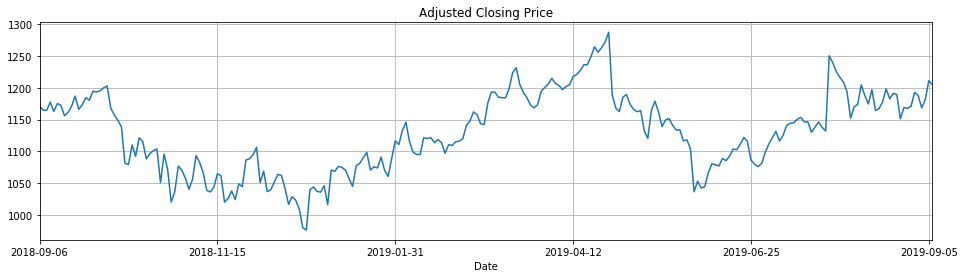

In [8]:
df["Adj Close"].plot(figsize=(16,4), title='Adjusted Closing Price', grid=True)
plt.show()

In [0]:
window_size=32
num_samples=len(df)-window_size

# Get indices of access for the data
indices=np.arange(num_samples).astype(np.int)[:,None]+np.arange(window_size+1).astype(np.int)


data = df['Adj Close'].values[indices] # Create the 2D matrix of training samples
X = data[:,:-1] # Each row represents 32 days in the past
y = data[:,-1] # Each output value represents the 33rd day

In [0]:
split_fraction=0.8
ind_split=int(split_fraction*num_samples)

In [0]:
X_train = X[:ind_split]
y_train = y[:ind_split]
X_test = X[ind_split:]
y_test = y[ind_split:]

In [14]:
X_test.shape

(44, 32)

In [15]:
y_test.shape

(44,)

**Modeling**

In [0]:
# Help Functions
def get_performance (model_pred):
  #Function returns standard performance metrics
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, model_pred).round(4))  
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, model_pred).round(4))  
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, model_pred)).round(4))
  
  
  
def get_plot (model_pred):
  plt.scatter(model_pred, y_test, color="gray")
  plt.plot(y_test, y_test, color='red', linewidth=2)

# 0. Lag as Baseline

In [0]:
# BASELINE
# Let prediction be most recent observation
y_pred_lag=np.roll(y_test,1)

In [20]:
get_performance(y_pred_lag)

Mean Absolute Error: 17.045
Mean Squared Error: 753.6997
Root Mean Squared Error: 27.4536


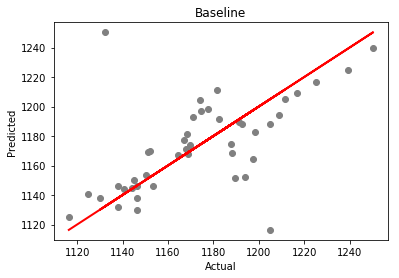

In [36]:
get_plot(y_pred_lag)
plt.title('Baseline')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# 1. Linear Regression

In [25]:
model_lr=LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred_lr=model_lr.predict(X_test)

In [28]:
get_performance(y_pred_lr)

Mean Absolute Error: 17.1813
Mean Squared Error: 615.9574
Root Mean Squared Error: 24.8185


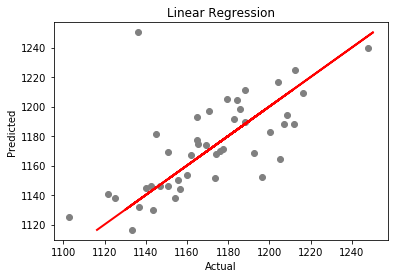

In [35]:
get_plot(y_pred_lr)
plt.title('Linear Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# 2. Ridge Regression

In [0]:
model_ridge = Ridge()
model_ridge.fit(X_train, y_train)

#generate predictions
y_pred_ridge=model_ridge.predict(X_test)

In [33]:
get_performance(y_pred_ridge)

Mean Absolute Error: 17.1811
Mean Squared Error: 615.9516
Root Mean Squared Error: 24.8184


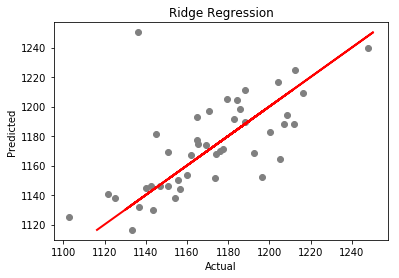

In [38]:
get_plot(y_pred_ridge)
plt.title('Ridge Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# 3. Gradient Boosting Trees

In [0]:
model_gb = GradientBoostingRegressor()
model_gb.fit(X_train, y_train)

# Infer
y_pred_gb = model_gb.predict(X_test)

In [40]:
get_performance(y_pred_gb)

Mean Absolute Error: 16.0332
Mean Squared Error: 630.8655
Root Mean Squared Error: 25.117


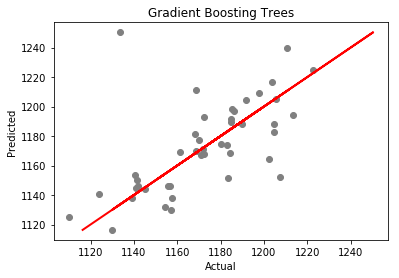

In [41]:
get_plot(y_pred_gb)
plt.title('Gradient Boosting Trees')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Comparison

In [51]:
model_lr.coef_

array([-0.01526944,  0.0900222 ,  0.02057276, -0.12342952,  0.09939413,
       -0.21876921,  0.05604134,  0.04703213, -0.14208517,  0.17385053,
       -0.03100146,  0.05141291, -0.01586865, -0.13276448,  0.04377869,
        0.02738909,  0.03243901,  0.06300389, -0.11052213,  0.0441546 ,
        0.14147085, -0.20908505,  0.0376017 ,  0.15905734, -0.20461903,
        0.15004937, -0.02294778, -0.04385291,  0.15354354,  0.01278684,
       -0.13189869,  0.94294711])

In [52]:
model_ridge.coef_

array([-0.01526394,  0.09001403,  0.02057576, -0.12342574,  0.09938072,
       -0.21875609,  0.05603455,  0.04702927, -0.14207477,  0.17383906,
       -0.03099108,  0.05140994, -0.01587635, -0.13275445,  0.04377376,
        0.02738804,  0.03244723,  0.06299244, -0.11051559,  0.04416118,
        0.14145574, -0.20907485,  0.03760495,  0.15904194, -0.20460089,
        0.15003961, -0.02294948, -0.04383983,  0.15353238,  0.01278736,
       -0.13187564,  0.94292418])

Note the "last value" feature weights are by far the highest for linear regression and ridge regression at 0.943 (last entry of the coefficient matrix).

In [0]:
df_comp=pd.DataFrame({"lag":np.absolute(y_test-y_pred_lag), 
              "lr":np.absolute(y_test-y_pred_lr), 
              "ridge":np.absolute(y_test-y_pred_ridge),
              "gb":np.absolute(y_test-y_pred_gb)})

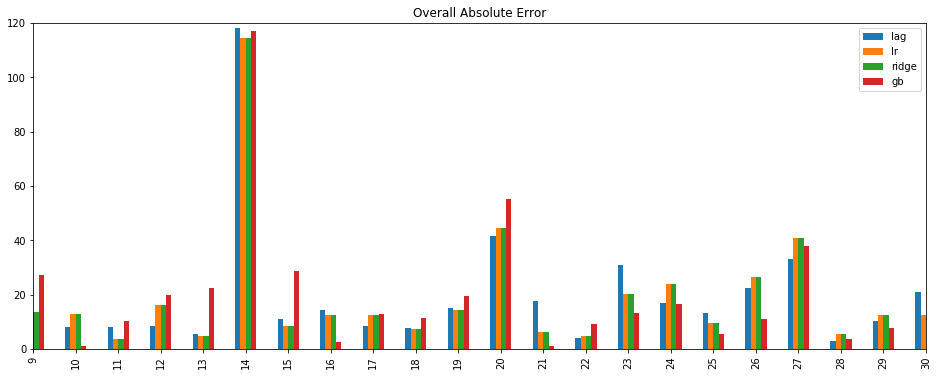

In [55]:
df_comp.plot.bar(figsize=(16, 6))
plt.title('Overall Absolute Error')
plt.ylim(0,120)
plt.xlim(9,30)
plt.show()

Conclusion: For this small data and test set, any of these approaches would be equally good (or bad). It will be interesting to see how RNNs and other models better suited to time series data will perform on large data sets.